<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-II/blob/main/Frecuentistas_Bayesianos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Frecuentista vs. Bayesianos.

El artículo presenta una descripción comparativa entre los enfoques frecuentista y bayesiano de la inferencia estadística.
A continuación, se desglosarán algunos puntos importantes que se tratan en el artículo, para después presentar los códigos que se realizan en el mismo.

- Diferencias Filosóficas: Se muestran las diferencias clave entre los enfoques frecuentistas y bayesianos. Para los frecuentistas, la probabilidad se entiende como la frecuencia a largo plazo de los eventos; en cambio, la definición del bayesiano hace hincapié en la probabilidad como una medida de incertidumbre respecto a los parámetros.

- La práctica: Existen consecuencias sobre la metodología del análisis estadístico procedente de las diferencias filosóficas; por lo general los métodos frecuentistas son partidarios del uso de parámetros de modelo fijos y ponen el énfasis en las cantidades atrapadas por los datos. En los métodos bayesianos, en cambio, no sólo se muestran partidarios del uso de creencias anteriores a la observación, sino que tienen la habilidad de modificar la información en función de los datos observados.  Como ya se había explicado en el video “Introducción a los modelos bayesianos usando PyMC3”.

- Herramientas estadísticas: Se hace un recorrido por diferentes paquetes de programacion que implementan ambos enfoques, donde los métodos frecuentistas se implementan a partir de paquetes estadísticos clásicos y el análisis bayesiano se ofrece mediante métodos de Monte Carlo por cadenas de Markov (MCMC) mediante el uso de bibliotecas como PyMC, emcee y PyStan para muestrear distribuciones posteriores (esto se mostrara mas adelante en los códigos).

- Aplicaciones de ejemplo: Un modelo lineal simple es usado para mostrar la aplicación de ambos enfoques, mediante un modelo que ajusta una línea a los datos con errores no conocidos. Se muestra cómo se construyen las funciones de verosimilitud junto con cómo los métodos bayesianos pueden dar interpretaciones más intuitivas sobre la incertidumbre.

En conclusión, la decisión acerca de cuál enfoque utilizar, el frecuentista o el bayesiano, muchas veces depende del tipo de problema a resolver y también de los gustos de las personas. Los dos enfoques tienen sus virtudes y son útiles para obtener los resultados científicos, siempre que se hagan las cosas de forma adecuada.


Cada codigo tiene una explicacion extendida sobre el razonamiento matematico que se sigue para la solucion de los distintos problemas que acontinuacion se presentan. En el presente resumen no se hara enfasis en estos razonamientos, estara mas enfocado en los codigos.

##Primer Codigo.
El siguiente codigo resuelve el siguiente problema:

Imaginemos que apuntamos un telescopio al cielo y observamos la luz que proviene de una sola estrella. Para simplificar, asumiremos que el flujo verdadero de fotones de la estrella es constante con el tiempo, es decir, que tiene un valor fijo $F$; también ignoraremos efectos como el fondo del cielo y errores sistemáticos. Supondremos que se realizan una serie de $N$ mediciones, donde la i-ésima medición reporta el flujo observado $F_i$ y el error $e_i$. La pregunta es, dado este conjunto de mediciones $D = {\{ F_i, e_i  }\} $, ¿cuál es nuestra mejor estimación del flujo verdadero $F$?

###Solucion frecuentista.

Se generan algunos datos de juguete. Dibujaremos 50 muestras $F_i$ con una media de 1000 (en unidades arbitrarias) y un error (conocido) $e_i$:

In [21]:
import numpy as np

In [22]:
np.random.seed(2) # for reproducibility
e = np.random.normal(30, 3, 50)
F = np.random.normal(1000, e)

In [23]:
w = 1. / e ** 2
F_hat = np.sum(w * F) / np.sum(w)
sigma_F = w.sum() ** -0.5

In [24]:
print("F= ",F_hat)

F=  998.6496963757094


##Segundo Codigo.
En el problema anterior no se dio una solucion bayesiana ya que es fácil demostrar que los dos enfoques son a menudo equivalentes para problemas simples, también es cierto que pueden divergir mucho en otras situaciones. En la práctica, esta divergencia se hace más clara de dos maneras diferentes:
1. El manejo de parámetros molestos: es decir, parámetros que afectan el resultado final, pero que no son de otro interés.
2. El manejo diferente de la incertidumbre: por ejemplo, la sutil (y a menudo pasada por alto) diferencia entre los intervalos de confianza frecuentistas y las regiones creíbles bayesianas.

En el siguiente codigo se trata de ver esta divergencia.


###Juego de Alice y Bob
Un juego de azar en el que Alice y Bob apuestan sobre el resultado de un proceso que no pueden observar directamente. Alice y Bob entran a una habitación. Detrás de una cortina hay una mesa de billar, que no pueden ver. Su amiga Carol lanza una bola por la mesa y marca dónde aterriza. Una vez que esta marca está en su lugar, Carol comienza a lanzar nuevas bolas por la mesa. Si la bola aterriza a la izquierda de la marca, Alice obtiene un punto; si aterriza a la derecha de la marca, Bob obtiene un punto. Podemos suponer que los lanzamientos de Carol son imparciales: es decir, las bolas tienen la misma oportunidad de terminar en cualquier parte de la mesa. La primera persona en alcanzar seis puntos gana el juego.


Aquí, la ubicación de la marca (determinado por el primer lanzamiento) puede considerarse un parámetro molesto: es desconocido y no es de interés inmediato, pero debe ser tenido en cuenta al predecir el resultado de los lanzamientos posteriores. Si este primer lanzamiento se establece muy a la derecha, entonces los lanzamientos subsiguientes favorecerán a Alice. Si se establece muy a la izquierda, Bob será favorecido en su lugar.

Dada esta configuración, buscamos responder a la siguiente pregunta: En un juego particular, después de ocho lanzamientos, Alice tiene cinco puntos y Bob tiene tres puntos. ¿Cuál es la probabilidad de que Bob obtenga seis puntos y gane el juego?


Sea:
- $B =$ Bob Gana
- $D=$ datos observados, es decir, $D = (n_A; n_B) = (5; 3)$
- $p =$ probabilidad desconocida de que una bola caiga del lado de Alice durante el juego actual.
Queremos calcular $P(B | D)$.

$$  P(B|D)= \frac{\int_{0}^{1}(1-p)^6p^5dp}{\int_{0}^{1}(1-p)^3p^5dp} $$

In [25]:
from scipy.special import beta
P_B_D = beta(6+1, 5+1) / beta(3+1, 5+1)

In [26]:
print("P(B|D)= ",P_B_D)

P(B|D)=  0.09090909090909091


##Codigos de diferentes librerias.

### Aplicación: Un Modelo Lineal Simple

Como ejemplo de un análisis impulsado por datos más realista, consideremos un modelo lineal simple de tres parámetros que ajusta una línea recta a datos con errores desconocidos. Los parámetros serán el intercepto $α$, la pendiente $β$ y la dispersión normal (desconocida) $σ$ alrededor de la línea.

Para los datos $D = {\{x_i, y_i}\}$, el modelo es:
$$ \hat{y}(x_i|\alpha ,\beta)=\alpha + \beta x_i $$

y la verosimilitud es el producto de la distribución gaussiana para cada punto:

$$ L(\mathbf{D} \mid α, β, \sigma) = (2\pi\sigma^2)^{-N/2} \prod_{i=1}^N \exp\left(-\frac{[y_i - \hat{y}(x_i \mid α, β)]^2}{2\sigma^2}\right) $$

Evaluaremos este modelo en el siguiente conjunto de datos:

In [27]:
import numpy as np
np.random.seed(42) # for repeatability
theta_true = (25, 0.5)
xdata = 100 * np.random.random(20)
ydata = theta_true[0] + theta_true[1] * xdata
ydata = np.random.normal(ydata, 10) # add error

A continuación, consideraremos una solución frecuentista a este problema calculada con el paquete `statsmodels`, así como una solución bayesiana calculada con varias implementaciones de MCMC en Python: `emcee`, `PyMC` y `PyStan`.

Solucion frecuentista

In [28]:
X = np.vstack([np.ones_like(xdata), xdata]).T
theta_hat = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, ydata))
y_hat = np.dot(X, theta_hat)
sigma_hat = np.std(ydata - y_hat)
Sigma = sigma_hat ** 2 * np.linalg.inv(np.dot(X.T, X))

In [29]:
import statsmodels.api as sm # version 0.5
X = sm.add_constant(xdata)
result = sm.OLS(ydata, X).fit()
sigma_hat = result.params
Sigma = result.cov_params()
print(result.summary2())

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.683   
Dependent Variable: y                AIC:                147.7737
Date:               2024-10-12 05:13 BIC:                149.7651
No. Observations:   20               Log-Likelihood:     -71.887 
Df Model:           1                F-statistic:        41.97   
Df Residuals:       18               Prob (F-statistic): 4.30e-06
R-squared:          0.700            Scale:              86.157  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      24.6361     3.7871   6.5053   0.0000   16.6797   32.5924
x1          0.4483     0.0692   6.4782   0.0000    0.3029    0.5937
-----------------------------------------------------------------
Omnibus:              1.996        Durbin-Watson:           2.758
Prob(Omnibus):   

##Solucion con emcee



In [30]:
!pip install emcee

In [31]:
import emcee # version 2.0
import matplotlib.pyplot as plt
import numpy as np
def log_prior(theta):
  alpha, beta, sigma = theta
  if sigma < 0:
    return -np.inf # log(0)
  else:
    return (-1.5 * np.log(1 + beta**2) - np.log(sigma))

def log_like(theta, x, y):
  alpha, beta, sigma = theta
  y_model = alpha + beta * x
  return -0.5 * np.sum(np.log(2*np.pi*sigma**2) + (y-y_model)**2 / sigma**2)

def log_posterior(theta, x, y):
  return log_prior(theta) + log_like(theta,x,y)

In [32]:
ndim = 3 # number of parameters in the model
nwalkers = 50 # number of MCMC walkers
nburn = 1000 # "burn-in" to stabilize chains
nsteps = 2000 # number of MCMC steps to take
starting_guesses = np.random.rand(nwalkers, ndim)

In [33]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[xdata,ydata])
sampler.run_mcmc(starting_guesses, nsteps)
# chain is of shape (nwalkers, nsteps, ndim):
# discard burn-in points and reshape:
trace = sampler.chain[:, nburn:, :]
trace = trace.reshape(-1, ndim).T

##Solucion con Pymc

In [34]:
!pip install git+https://github.com/pymc-devs/pymc@v2.3

  Cloning https://github.com/pymc-devs/pymc (to revision v2.3) to /tmp/pip-req-build-uxndcbd9
  Running command git clone --filter=blob:none --quiet https://github.com/pymc-devs/pymc /tmp/pip-req-build-uxndcbd9
  Running command git checkout -q v2.3
  error: pathspec 'v2.3' did not match any file(s) known to git
  error: subprocess-exited-with-error
  
  × git checkout -q v2.3 did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git checkout -q v2.3 did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [39]:
!pip install numpy==1.9.3 scipy==0.15.1

  Using cached numpy-1.9.3.zip (4.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached scipy-0.15.1.zip (12.7 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
  Running setup.py clean for numpy
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scipy
  Running setup.py clean for scipy
Failed to build numpy scipy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy, scipy)


In [41]:
import pymc # version 2.3
alpha = pymc.Uniform('alpha', -100, 100)

@pymc.stochastic(observed=False)
def beta(value=0):
  return -1.5 * np.log(1 + value**2)

@pymc.stochastic(observed=False)
def sigma(value=1):
  return -np.log(abs(value))

# Define the form of the model and likelihood
@pymc.deterministic
def y_model(x=xdata, alpha=alpha, beta=beta):
  return alpha + beta * x
y = pymc.Normal('y', mu=y_model, tau=1./sigma**2, observed=True, value=ydata)

# package the full model in a dictionary
model = dict(alpha=alpha, beta=beta, sigma=sigma, y_model=y_model, y=y)

TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.

In [42]:
S = pymc.MCMC(model)
S.sample(iter=100000, burn=50000)
trace = [S.trace('alpha')[:], S.trace('beta')[:],S.trace('sigma')[:]]

AttributeError: module 'pymc' has no attribute 'MCMC'

##Solucion con Pystan

In [43]:
!pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.8 MB/s eta 0:00:00


In [45]:
import pystan # version 2.2
model_code = """
data {
int<lower=0> N; // number of points
real x[N]; // x values
real y[N]; // y values
}
parameters {
real alpha_perp;
real<lower=-pi()/2, upper=pi()/2> theta;
real log_sigma;
}
transformed parameters {
real alpha;
real beta;
real sigma;
real ymodel[N];
alpha <- alpha_perp / cos(theta);
beta <- sin(theta);
sigma <- exp(log_sigma);
for (j in 1:N)
ymodel[j] <- alpha + beta * x[j];
}
model {
y ~ normal(ymodel, sigma);
}
"""
# perform the fit & extract traces
data = {'N': len(xdata), 'x': xdata, 'y': ydata}
fit = pystan.stan(model_code=model_code, data=data, iter=25000, chains=4)
tr = fit.extract()
trace = [tr['alpha'], tr['beta'], tr['sigma']]

ModuleNotFoundError: No module named 'pystan'

Se registraron errores de ejecucion en los codigos que usan las siguientes librerias: `PyMC` y `PyStan`. Por errores de compatibilidad o simplemente porque son paqueterias viejas.

Es por ello que para la comparacion de los diferentes resultados se mostrara la grafica presentada en el articulo.

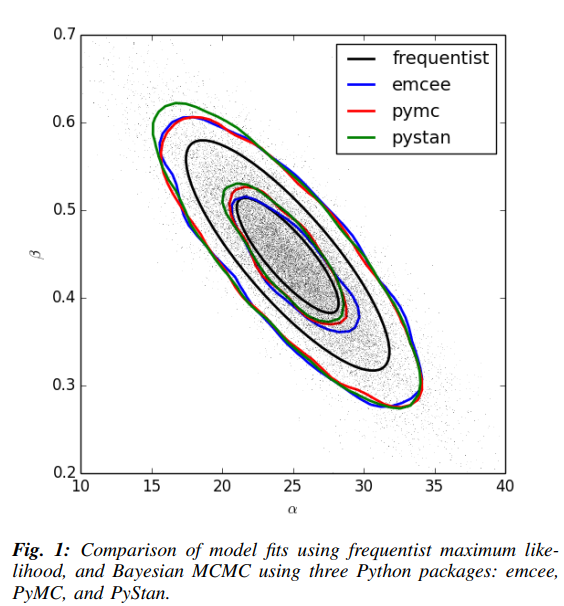

##Conclusion.
Por experiencia de los autores, entre las diferentes librerias, Emcee es el más sencillo de usar, mientras que PyMC requiere una codificación más específica, y PyStan es el más complejo, ya que exige la escritura directa de código Stan para la especificación del modelo.

